In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from nltk.sem.chat80 import borders
from pyparsing import alphas
from seaborn import dark_palette

palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set_palette(palette)

df = pd.read_csv('../../dataset/tables_columns_clean.csv')

df.describe()

,table_id,column_name,id_file
count,14653,14618,14653
unique,337,5439,741
top,S4.T2,dataset,2409.01012v1
freq,930,548,125


In [12]:
# some set theory operations, using Jaccard similarity find tables with similar columns

def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))


tables = df['table_id'].unique()
table_similarity = []
for i in range(len(tables)):
    for j in range(i + 1, len(tables)):
        table1 = df[df['table_id'] == tables[i]]['column_name'].tolist()
        table2 = df[df['table_id'] == tables[j]]['column_name'].tolist()
        similarity = jaccard_similarity(table1, table2)
        table_similarity.append((tables[i], tables[j], similarity, df[df['table_id'] == tables[i]]['id_file'].values[0], df[df['table_id'] == tables[j]]['id_file'].values[0]))
        

In [18]:

table_similarity = pd.DataFrame(table_similarity, columns=['table1', 'table2', 'similarity','id_file1','id_file2'])
table_similarity = table_similarity[table_similarity['similarity'] > 0]
table_similarity['is_same_file'] = table_similarity['id_file1'] == table_similarity['id_file2']
table_similarity = table_similarity.sort_values(by='similarity', ascending=False)

table_similarity

,table1,table2,similarity,id_file1,id_file2,is_same_file
47303,S3.SS2.22,S3.SS3.63,1.000000,2406.16924v1,2406.16924v1,True
31416,S1.T3,S1.T4,1.000000,2405.19749v2,2405.19749v2,True
56572,A9.T14,A9.8.8,1.000000,2410.09776v1,2410.09776v1,True
56613,Sx1.T0,Sx1.T0a,1.000000,2410.13042v1,2410.13042v1,True
49477,section2.11.2,section2.15.6,1.000000,2407.04960v1,2407.04960v1,True
...,...,...,...,...,...,...
9781,S4.T2,S8.T10,0.001493,2404.14240v1,2406.07769v2,False
9782,S4.T2,S8.T11,0.001493,2404.14240v1,2406.07769v2,False
9764,S4.T2,S3.T11,0.001490,2404.14240v1,2406.05933v1,False
9700,S4.T2,A1.T13,0.001490,2404.14240v1,2405.00981v2,False


In [19]:
# split the tables into two groups, same file and different files
same_file = table_similarity[table_similarity['is_same_file'] == True]

diff_file = table_similarity[table_similarity['is_same_file'] == False]

diff_file


,table1,table2,similarity,id_file1,id_file2,is_same_file
43536,S1.1,Sx7.T3,0.833333,2406.08804v2,2409.10343v1,False
42154,S7.T9,S7.T10,0.727273,2406.07769v2,2407.13699v1,False
49012,S8.T12,S8.T13,0.700000,2407.00062v1,2407.09398v2,False
41984,S7.T8,S7.T10,0.666667,2406.07769v2,2407.13699v1,False
48893,S7.T11,S7.T10,0.666667,2407.00062v1,2407.13699v1,False
...,...,...,...,...,...,...
9781,S4.T2,S8.T10,0.001493,2404.14240v1,2406.07769v2,False
9782,S4.T2,S8.T11,0.001493,2404.14240v1,2406.07769v2,False
9764,S4.T2,S3.T11,0.001490,2404.14240v1,2406.05933v1,False
9700,S4.T2,A1.T13,0.001490,2404.14240v1,2405.00981v2,False


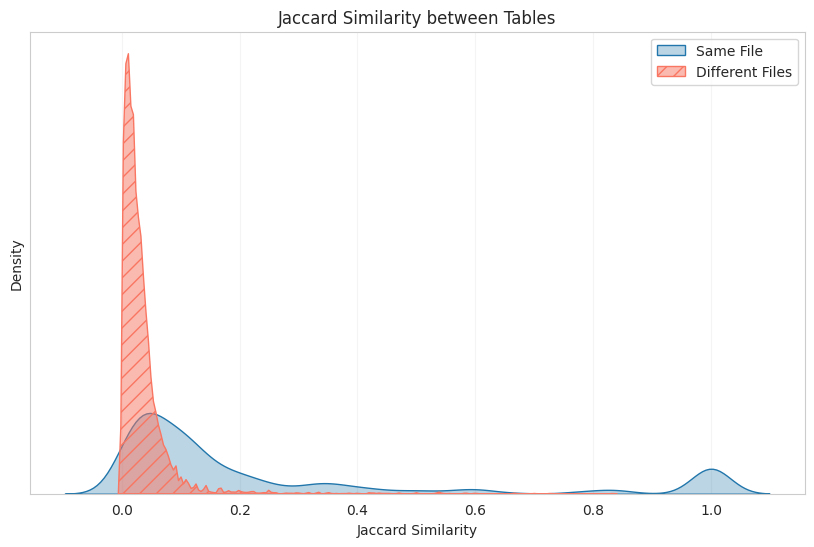

In [25]:
# plot the similarity between tables in the same file and different files
plt.figure(figsize=(10, 6))
sns.kdeplot(same_file['similarity'], color=palette[0], label='Same File', fill=True, bw_adjust=.35, alpha=0.3)
sns.kdeplot(diff_file['similarity'],  color=palette[1], label='Different Files', fill=True, bw_adjust=.35, alpha=0.5, hatch='//')
plt.xlabel('Jaccard Similarity')
plt.ylabel('Density')
plt.yticks([])
plt.title('Jaccard Similarity between Tables')
plt.grid(alpha=0.2)
plt.legend()